In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [15]:
# suppress all warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
# read .tab file into pandas dataframe
campaigns = pd.read_csv('../assignment_2023_2/NAVCO 1.2 Updated.tab', sep='\t')
campaigns.head(5)

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
0,4.0,Afghans,Afghanistan,1978.0,1979.0,Afghan government,1.0,0.0,0.0,0.0,...,0.0,613.0,10000.0,0.000641,1.0,1.0,NaN,1.0,1.0,1.0
1,3.0,Afghan resistance,Afghanistan,1980.0,1989.0,Soviet occupation,1.0,0.0,0.0,0.0,...,0.0,3281.0,10000.0,0.000685,1.0,0.0,NaN,1.0,0.0,1.0
2,218.0,Taliban/anti-government forces,Afghanistan,1992.0,1996.0,Afghan regime,1.0,0.0,0.0,0.0,...,0.0,1370.0,20000.0,0.000893,1.0,0.0,NaN,1.0,0.0,0.0
3,217.0,Taliban,Afghanistan,2001.0,2014.0,Afghan government,0.0,0.0,1.0,1.0,...,0.0,4391.0,60000.0,0.001625,1.0,1.0,NaN,1.0,1.0,0.0
4,5.0,Albanian anti-communist,Albania,1990.0,1991.0,Communist regime,1.0,0.0,0.0,0.0,...,0.0,442.0,300000.0,0.091068,1.0,0.0,0.0,1.0,1.0,0.0


In [17]:
campaigns.columns

Index(['NAVCOID', 'CAMPAIGN', 'LOCATION', 'BYEAR', 'EYEAR', 'TARGET',
       'SUCCESS', 'LIMITED', 'FAILURE', 'ONGOING', 'NONVIOL', 'VIOL',
       'REGCHANGE', 'FSELFDET', 'SECESSION', 'OTHER', 'DURATION',
       'PARTICIPATION', 'PERCENTAGEPOPULARPARTICIPATION', 'REGVIOL', 'DEFECT',
       'VIOLENTFLANK', 'VIOLSIM', 'REGAID', 'STATESUP'],
      dtype='object')

In [18]:
post_2010_violent = campaigns[campaigns['BYEAR'] >= 2010 & (campaigns['VIOL'] == 1)]
post_2010_violent.shape

(389, 25)

# 1. Plots

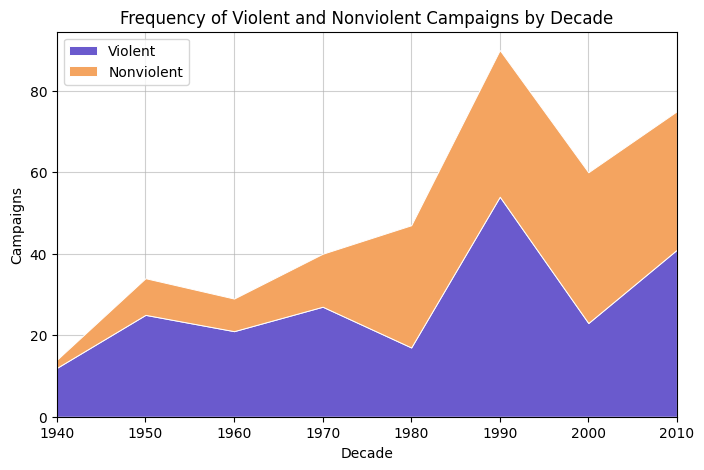

In [19]:

# Convert EYEAR to decades
campaigns['DECADE'] = (campaigns['EYEAR'] // 10) * 10

# Group by decade and count the occurrences of violent and nonviolent campaigns
counts = campaigns.groupby(['DECADE'])[['VIOL', 'NONVIOL']].sum().reset_index()
plt.figure(figsize=(8, 5))
plt.stackplot(counts['DECADE'], counts['VIOL'], counts['NONVIOL'], labels=['Violent', 'Nonviolent'],
               colors=['slateblue', 'sandybrown'], linewidth=0.7, edgecolor='white')
plt.xlabel('Decade')
plt.ylabel('Campaigns')
plt.title('Frequency of Violent and Nonviolent Campaigns by Decade')
plt.legend(loc='upper left')
# adjust grid lines and set them behind plotted data
plt.gca().set_axisbelow(True)
# set x-axis limits to the min and max of the decade column
plt.xlim(counts['DECADE'].min(), counts['DECADE'].max())
plt.grid(True, alpha=0.6)
plt.show()


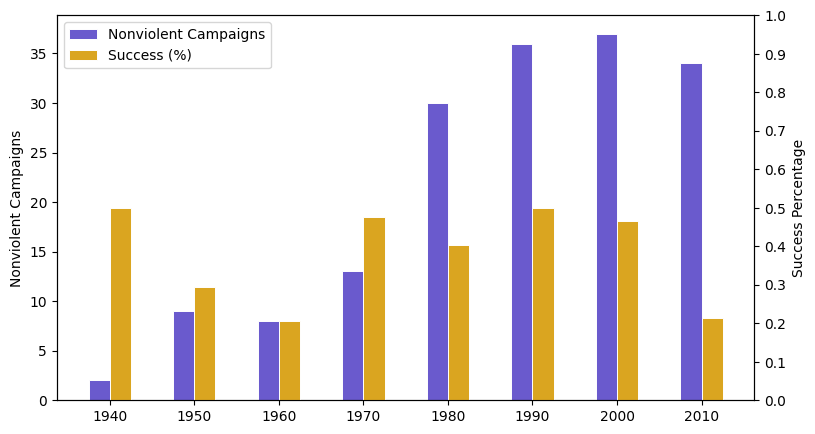

In [20]:
# Filter data from 1940 onwards
campaigns_filtered = campaigns[campaigns['EYEAR'] >= 1940]

# Calculate the counts of nonviolent campaigns per decade
campaigns_filtered['Decade'] = (campaigns_filtered['EYEAR'] // 10) * 10
nonviolent_counts = campaigns_filtered[campaigns_filtered['NONVIOL'] == 1].groupby('Decade').size()

# Convert index to integers
nonviolent_counts.index = nonviolent_counts.index.astype(int)  

# Calculate the mean success percentage per decade (scaled from 0 to 1)
success_percentage = campaigns_filtered.groupby('Decade')['SUCCESS'].mean()

# Create bar plot for each decade with side-by-side bars for counts and success percentage
bar_width = 0.25
index = np.arange(len(nonviolent_counts))

fig, ax1 = plt.subplots(figsize=(9, 5))

# Plotting bars for counts of nonviolent campaigns
ax1.bar(index - bar_width/2, nonviolent_counts, bar_width, color='slateblue', label='Nonviolent Campaigns', linewidth=0.7, edgecolor='white')
ax1.set_ylabel('Nonviolent Campaigns')
ax1.set_xticks(index)
ax1.set_xticklabels(nonviolent_counts.index)

# Create a twin axis for success percentage (right)
ax2 = ax1.twinx()
# Plotting bars for success percentage
ax2.bar(index + bar_width/2, success_percentage, bar_width, color='goldenrod', label='Success (%)', linewidth=0.7, edgecolor='white')
ax2.set_ylabel('Success Percentage')
ax2.set_ylim(0, 1)  # Set the y-axis limit from 0 to 1
ax2.set_yticks(np.arange(0, 1.1, 0.1))  # Set y-axis ticks to represent the scaled range (0 to 1)

# Combine both legends and display
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.grid(False)
plt.show()


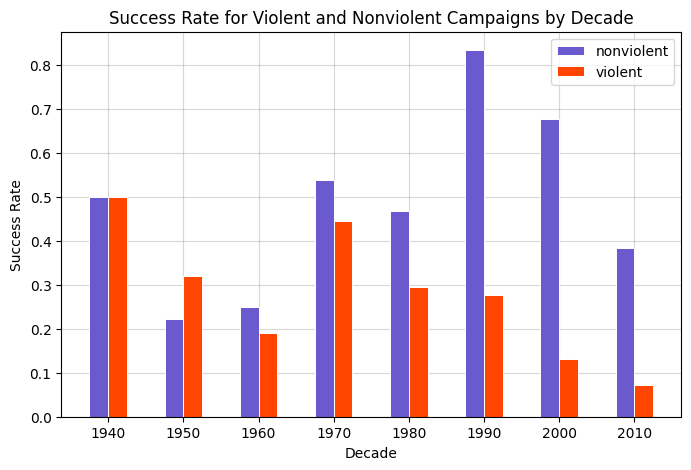

In [21]:
# needed data
violent_counts = campaigns_filtered[campaigns_filtered['VIOL'] == 1].groupby('Decade').size()
nonviolent_counts = campaigns_filtered[campaigns_filtered['NONVIOL'] == 1].groupby('Decade').size()
success_percentage = campaigns_filtered.groupby('Decade')['SUCCESS'].mean()

success_percentage_nonviolent = campaigns_filtered[campaigns_filtered['NONVIOL'] == 1].groupby('Decade')['SUCCESS'].mean()
success_percentage_violent = campaigns_filtered[campaigns_filtered['VIOL'] == 1].groupby('Decade')['SUCCESS'].mean()
num_decades = len(success_percentage_nonviolent)
# Assuming you have 'success_percentage_violent' and 'success_percentage_nonviolent' calculated

# Create a line plot for success rates of violent and nonviolent campaigns by decade
plt.figure(figsize=(8, 5))

bar_width = 0.25

plt.bar(index - bar_width/2, success_percentage_nonviolent, bar_width, color='slateblue', label='nonviolent', linewidth=0.7, edgecolor='white')
plt.bar(index + bar_width/2, success_percentage_violent, bar_width, color='orangered', label='violent', linewidth=0.7, edgecolor='white')

# Labeling and customization
plt.xlabel('Decade')
plt.ylabel('Success Rate')
plt.title('Success Rate for Violent and Nonviolent Campaigns by Decade')
plt.xticks(np.arange(num_decades), success_percentage_nonviolent.index.astype(int))
plt.legend()
# adjust grid lines and set them behind plotted data
plt.gca().set_axisbelow(True)
plt.grid(True, alpha=0.5)
plt.show()


## 2. Largest Resistance Campaigns, 1946-2014

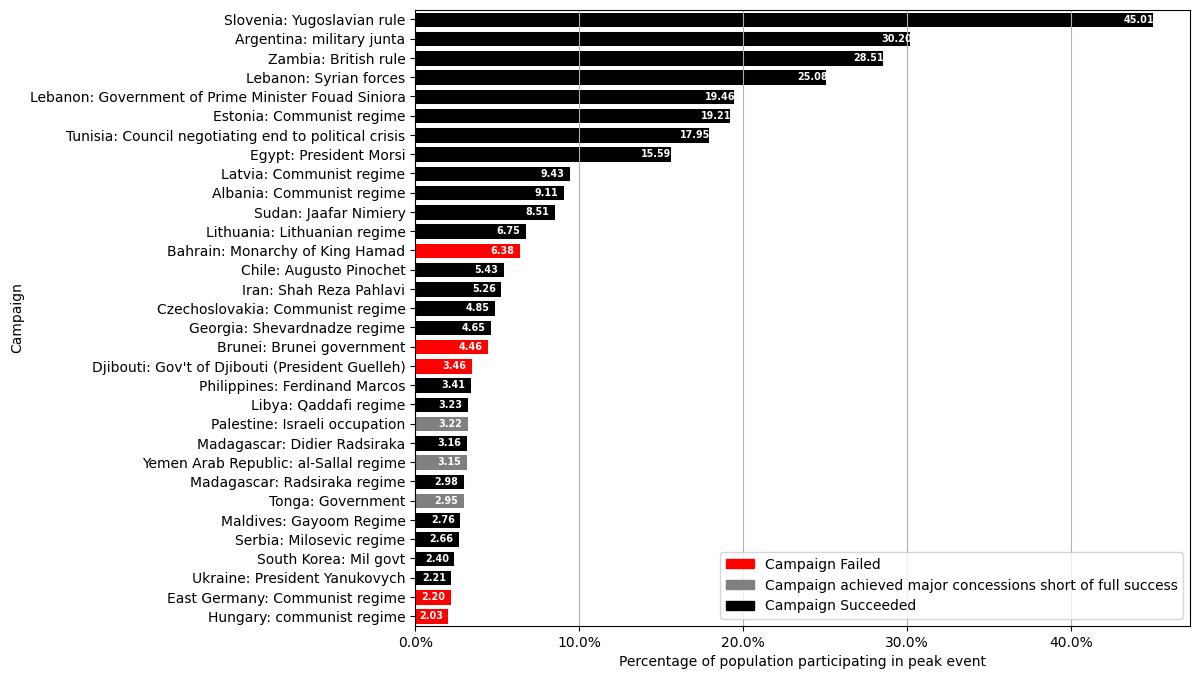

In [22]:
# Filter resistance campaigns with participation at least 2.0% and from 1946-2014
resistance_campaigns = campaigns[(campaigns['PERCENTAGEPOPULARPARTICIPATION'] >= 0.02) & (campaigns['EYEAR'] >= 1946) & (campaigns['EYEAR'] <= 2014)]

# Sort values based on the participation percentage in descending order
resistance_campaigns_sorted = resistance_campaigns.sort_values(by='PERCENTAGEPOPULARPARTICIPATION', ascending=True)

colors = []
for limited, failed, success in zip(resistance_campaigns_sorted['LIMITED'], resistance_campaigns_sorted['FAILURE'], resistance_campaigns_sorted['SUCCESS']):
    if limited == 1:
        colors.append('grey')  # Campaign had limited success
    elif failed == 1:
        colors.append('red')  # Campaign failed
    elif success == 1:
        colors.append('black')  # Campaign succeeded
    else:
        colors.append('white')  # Default color for unknown status (change as needed)

# Create a horizontal bar plot with modified colors and titles
# a little more space betwwen bars
plt.figure(figsize=(10, 8))
bars = plt.barh(resistance_campaigns_sorted['LOCATION'] + ': ' + resistance_campaigns_sorted['TARGET'],
                resistance_campaigns_sorted['PERCENTAGEPOPULARPARTICIPATION'],
                color=colors, edgecolor='white', linewidth=0.7)

# labels and grid
plt.xlabel('Percentage of population participating in peak event')
plt.ylabel('Campaign')
plt.grid(axis='x')

# Show legend based on success status
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color='red', label='Campaign Failed'),
                    plt.Rectangle((0, 0), 1, 1, color='grey', label='Campaign achieved major concessions short of full success'),
                    plt.Rectangle((0, 0), 1, 1, color='black', label='Campaign Succeeded')],
           loc='best')

# remove extra whitespace on upper and lower ends of plot
plt.ylim(-0.5, len(resistance_campaigns_sorted)-0.5)

# Add text labels and adjust their alignment
for i, bar in enumerate(bars):
    plt.text(bar.get_width() - 0.018, bar.get_y() + bar.get_height()/2, f'{resistance_campaigns_sorted.iloc[i]["PERCENTAGEPOPULARPARTICIPATION"] * 100:.2f}', ha='left',
             va='center', color='white', fontsize='x-small' , fontweight='bold')
    
plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))


plt.show()


# Greece

In [23]:
# get all greek campaigns
greek_campaigns = campaigns[campaigns['LOCATION'] == 'Greece']
# 2 findings, 1 resulted in a success, 1 in a failure
# interesting observation: the greek civil war of 1946 to get rid of british occupation was marked as a failure as 0.5% of the population participated
# interesting observation: despite the very low % of popular participation, the anti military of 1973 was successful
print(greek_campaigns['SUCCESS'])
print(greek_campaigns['PERCENTAGEPOPULARPARTICIPATION'] * 100)

119    0.0
120    1.0
Name: SUCCESS, dtype: float64
119    0.509165
120    0.027875
Name: PERCENTAGEPOPULARPARTICIPATION, dtype: float64


# 3 Regression

In [24]:
# Examine the effect of participation on the probability of campaign success. 
# You should run a logistic regression for success on membership per capita,
#  controlling for the location’s logged population the year the campaign ends.
from statsmodels.formula.api import logit

# filtering
# drop campaigns with very low participation
campaigns = campaigns[campaigns['PERCENTAGEPOPULARPARTICIPATION'] > 0.00000035]

# Population calculation
# PERCENTAGEPOPULARPARTICIPATION is participation/population
# so Population = PARTICIPATION / PERCENTAGEPOPULARPARTICIPATION
campaigns['POPULATION'] = campaigns['PARTICIPATION'] / campaigns['PERCENTAGEPOPULARPARTICIPATION']

# get data for regression
reg_data = campaigns[['SUCCESS', 'PARTICIPATION', 'PERCENTAGEPOPULARPARTICIPATION' , 'POPULATION']].dropna()

# compute logged population
reg_data['LOGPOPULATION'] = np.log(reg_data['POPULATION'])

# compute logged participation
reg_data['LOGPARTICIPATION'] = np.log(reg_data['PARTICIPATION'])

# logit model
model = logit("SUCCESS ~ PERCENTAGEPOPULARPARTICIPATION + LOGPOPULATION", data=reg_data).fit()
print(model.summary2())



Optimization terminated successfully.
         Current function value: 0.607865
         Iterations 8
                                Results: Logit
Model:                   Logit                Method:               MLE       
Dependent Variable:      SUCCESS              Pseudo R-squared:     0.089     
Date:                    2023-11-28 17:42     AIC:                  467.9772  
No. Observations:        380                  BIC:                  479.7977  
Df Model:                2                    Log-Likelihood:       -230.99   
Df Residuals:            377                  LL-Null:              -253.58   
Converged:               1.0000               LLR p-value:          1.5449e-10
No. Iterations:          8.0000               Scale:                1.0000    
------------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------

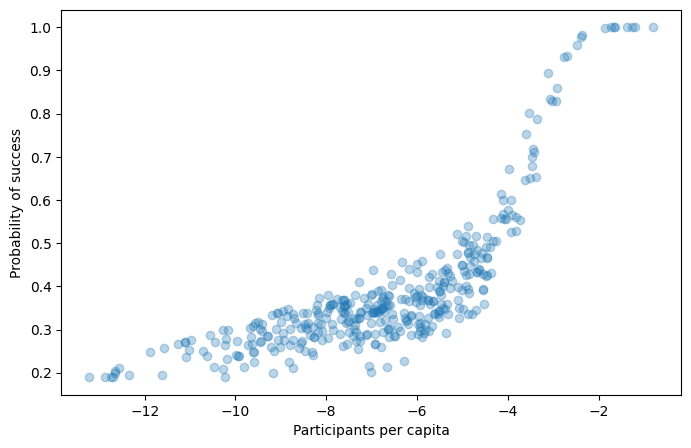

In [25]:
# Having done that, create a scatter plot 
# showing the logged participants per capita, on the $x$ axis, and the probability of success, on the $y$ axis. 

# get predicted probabilities
x_values = np.log(reg_data['PERCENTAGEPOPULARPARTICIPATION']) 
y_values = model.predict(reg_data)

# plot
plt.figure(figsize=(8, 5))
plt.scatter(x_values, y_values, alpha=0.3)
plt.xlabel('Participants per capita')
plt.ylabel('Probability of success')
plt.show()

# 4. Participation tipping point

In [26]:
# # Define bins based on participation percentages
bins = [0, 0.000035, 0.00015, 0.0006, 0.0025, 0.01 , 0.035, float('inf')]
bin_labels = [ 'less than 0.0035%', '0.0035% - 0.015%', '0.015% - 0.06%', '0.06% - 0.25%', '0.25% - 1.0%', '1.0% - 3.5% ', 'greater than 3.5%']

# Assign each observation to a bin based on 'Peak Popular Participation (%)'
campaigns['PARTICIPATION_BIN'] = pd.cut(campaigns['PERCENTAGEPOPULARPARTICIPATION'], bins=bins, labels=bin_labels, right=False)

# Group data by participation bins and calculate success rate
campaigns_grouped_on_bins = campaigns.groupby('PARTICIPATION_BIN')['SUCCESS'].agg(['count', 'mean']).reset_index()
campaigns_grouped_on_bins.rename(columns={'count': 'Observations', 'mean': 'Success Rate'}, inplace=True)

# transform the success rate to percentage
campaigns_grouped_on_bins['Success Rate'] = campaigns_grouped_on_bins['Success Rate'] * 100

# Display the table
print(campaigns_grouped_on_bins)


   PARTICIPATION_BIN  Observations  Success Rate
0  less than 0.0035%            24      4.166667
1   0.0035% - 0.015%            44      9.090909
2     0.015% - 0.06%            66     24.242424
3      0.06% - 0.25%            95     45.263158
4       0.25% - 1.0%            92     45.652174
5       1.0% - 3.5%             41     60.975610
6  greater than 3.5%            18     88.888889


In [27]:
# # From the results you obtained in the previous question, 
# # find the percentage of the population that is the tipping point for success in a campaign with 99% probability.

# # obtain the PREDICTED_PROB column from the model
# campaigns['PREDICTED_PROB'] = model.predict(reg_data)

# # Sort the DataFrame by 'PREDICTED_PROB' in descending order
# campaigns_sorted_by_prob_success = campaigns.sort_values(by='PREDICTED_PROB', ascending=True)

# # Calculate the cumulative sum of probabilities
# campaigns_sorted_by_prob_success['CUMULATIVE_PROB'] = campaigns_sorted_by_prob_success['PREDICTED_PROB'].cumsum()

# # Find the percentage of the population that reaches 99% probability
# tipping_point = campaigns_sorted_by_prob_success[campaigns_sorted_by_prob_success['CUMULATIVE_PROB'] >= 0.99]['PERCENTAGEPOPULARPARTICIPATION'].min()

# print(f"The tipping point for success with a 99% probability is {tipping_point * 100} % of the population.")


# 5. Nonviolent Resistance and Target Regime Type

Examine whether nonviolent resistance remains significant even if we control for the regime type. Run a logistic   regression of success on the nonviolence indicator controlling for the Polity V score of campaign target, the log of participation, and the location’s logged population the year the campaign ends.

In [41]:
# read polity data in excel
polity = pd.read_excel('../assignment_2023_2/p5v2018.xls')

# make sure the year column is an integer
campaigns['EYEAR'] = campaigns['EYEAR'].astype(int)

# rename country column in polity to LOCATION
polity.rename(columns={'country': 'LOCATION'}, inplace=True)

# rename year column in polity to EYEAR
polity.rename(columns={'year': 'EYEAR'}, inplace=True)

# Add the polity column from the polity df to the campaigns dataframe only for the year the campaign ended
merged_data = pd.merge(campaigns, polity, on=['LOCATION', 'EYEAR'], how='left')

# get only relevant columns
merged_reg_data = merged_data[['LOCATION', 'EYEAR', 'polity', 'SUCCESS', 'VIOL', 'NONVIOL' , 'PARTICIPATION', 'PERCENTAGEPOPULARPARTICIPATION', 'POPULATION']]
merged_reg_data.rename(columns={'polity': 'POLITY'}, inplace=True)
merged_reg_data.head(5)


,LOCATION,EYEAR,POLITY,SUCCESS,VIOL,NONVIOL,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,POPULATION
0,Afghanistan,1979,-66.0,1.0,1.0,0.0,10000.0,0.000641,1.560000e+07
1,Afghanistan,1989,-8.0,1.0,1.0,0.0,10000.0,0.000685,1.460000e+07
2,Afghanistan,1996,-7.0,1.0,1.0,0.0,20000.0,0.000893,2.240000e+07
3,Afghanistan,2014,-1.0,0.0,1.0,0.0,60000.0,0.001625,3.692109e+07
4,Albania,1991,-88.0,1.0,0.0,1.0,300000.0,0.091068,3.294227e+06


In [44]:
# Run a logistic regression of success on the nonviolence indicator controlling for the Polity V score of campaign target,
#  the log of participation, and the location’s logged population the year the campaign ends.

# filtering
# rename polity column to POLITY
merged_reg_data.rename(columns={'polity': 'POLITY'}, inplace=True)

# logit model
model = logit("SUCCESS ~ NONVIOL + POLITY + np.log(PERCENTAGEPOPULARPARTICIPATION) + np.log(POPULATION) ", data=merged_reg_data).fit()
print(model.summary2())


Optimization terminated successfully.
         Current function value: 0.542765
         Iterations 6
                                    Results: Logit
Model:                     Logit                   Method:                  MLE       
Dependent Variable:        SUCCESS                 Pseudo R-squared:        0.194     
Date:                      2023-11-28 18:08        AIC:                     341.0868  
No. Observations:          305                     BIC:                     359.6883  
Df Model:                  4                       Log-Likelihood:          -165.54   
Df Residuals:              300                     LL-Null:                 -205.27   
Converged:                 1.0000                  LLR p-value:             2.2774e-16
No. Iterations:            6.0000                  Scale:                   1.0000    
--------------------------------------------------------------------------------------
                                        Coef.  Std.Err.    z    